# Ventura County Historic Wildfires, 1890-Present
The goal of this notebook is to answer the question "Have wildfires in Ventura County increased in size over time?" This notebook will perform EDA and then use a map visualization to perform a spatial analysis.

In [1]:
#import Ventura County Historic Wildfire Data
import pandas as pd

df = pd.read_csv (r'C:\Users\danie\Dropbox\PC\Desktop\Wildfires\Data\VC_Wildfires.csv')
print (df)

     Unnamed: 0  Unnamed: 0.1             X            Y                NAME  \
0             0             4   67118.18052 -392685.1673           Cozy Dell   
1             1             5   58277.75706 -396457.0305          Los Padres   
2             2             6   64893.44768 -392802.2083            Matilija   
3             3             7   62415.71011 -399533.0521      Feroud / Aliso   
4             4             8   68796.04835 -397968.6795         San Antonio   
..          ...           ...           ...          ...                 ...   
406         406           410  106512.80840 -427747.9741   Foothill Incident   
407         407           411   37153.62762 -369380.1505           Zaca Fire   
408         408           412   61676.88450 -410239.5657               Shell   
409         409           413   60631.81147 -408807.8000    Vintage Incident   
410         410           417  101793.04360 -406758.4899  Guiberson Incident   

     ACRES_RPT  ACRES_CALC       COMMEN

In [2]:
#view data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 37 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    411 non-null    int64  
 1   Unnamed: 0.1  411 non-null    int64  
 2   X             411 non-null    float64
 3   Y             411 non-null    float64
 4   NAME          298 non-null    object 
 5   ACRES_RPT     411 non-null    int64  
 6   ACRES_CALC    411 non-null    int64  
 7   COMMENT       15 non-null     object 
 8   RUCODE        20 non-null     object 
 9   FULL_LABEL    409 non-null    object 
 10  INCIDENT_N    32 non-null     object 
 11  DECADE        411 non-null    int64  
 12  MONTH         411 non-null    int64  
 13  DAY           411 non-null    int64  
 14  RX_BURN       30 non-null     object 
 15  NAMELABEL     405 non-null    object 
 16  UIDENT        386 non-null    object 
 17  ACRES         411 non-null    float64
 18  STATE         410 non-null    

In [3]:
#sort data by year
df.sort_values('DECADE')

,Unnamed: 0,Unnamed: 0.1,X,Y,NAME,ACRES_RPT,ACRES_CALC,COMMENT,RUCODE,FULL_LABEL,...,CAUSE,REPORT_AC,INC_NUM,CONTR_NUM,PROJ_NAME,BURN_DATE,END_DATE,RX_TYPE,RX_CONSUM,Hectares
0,0,4,67118.18052,-392685.1673,Cozy Dell,3200,2975,NaN,NaN,1898/09/01,...,0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,1203.603520
1,1,5,58277.75706,-396457.0305,Los Padres,21200,20546,NaN,NaN,1898/09/01,...,0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,8311.115820
2,2,6,64893.44768,-392802.2083,Matilija,14000,2641,Rpt > Calc'd,NaN,1898/04/01,...,0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,1068.666136
3,3,7,62415.71011,-399533.0521,Feroud / Aliso,500,731,NaN,NaN,8/1/1902,...,0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,295.982772
4,4,8,68796.04835,-397968.6795,San Antonio,570,380,NaN,NaN,10/1/1903,...,0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,153.863339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,379,383,66837.53336,-399444.7693,Kenewa Incident,80,80,NaN,NaN,8/23/2000,...,0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,32.381834
378,378,382,69102.36606,-400832.0800,Creek Incident,80,77,NaN,NaN,9/6/2000,...,0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,31.252283
374,374,378,74781.19313,-402870.0083,Sloan,3000,3441,Ongoing,NaN,1/25/2002,...,0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,1392.528434
394,394,398,56666.27064,-404996.1270,Haley,330,251,NaN,NaN,11/19/2003,...,0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,101.673468


<AxesSubplot:ylabel='Frequency'>

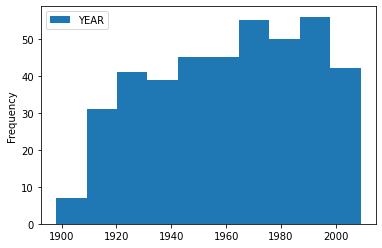

In [19]:
#identifying wildfires by year
df.plot.hist(y = 'YEAR')

# More Fires in Recent Years
We can see from the above histogram that the sheer number of fires has increased in recent decades, but has the average size increased as well?

In [9]:
#sort data by size
df.sort_values('Hectares')

,Unnamed: 0,Unnamed: 0.1,X,Y,NAME,ACRES_RPT,ACRES_CALC,COMMENT,RUCODE,FULL_LABEL,...,CAUSE,REPORT_AC,INC_NUM,CONTR_NUM,PROJ_NAME,BURN_DATE,END_DATE,RX_TYPE,RX_CONSUM,Hectares
226,226,230,69680.79335,-393769.4382,Foothill,16,5,NaN,NaN,7/1/1968,...,0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,2.299969
219,219,223,79315.08305,-395290.8630,Sisar Canyon,25,6,NaN,NaN,10/10/1967,...,0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,2.683531
126,126,130,64744.38298,-399715.0619,Ventura Avenue,28,7,NaN,NaN,8/1/1944,...,0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,3.166318
227,227,231,79382.14437,-393698.8156,Sisar Canyon,24,7,NaN,NaN,6/1/1968,...,0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,3.182338
261,261,265,122314.56930,-426460.1958,NaN,7,7,NaN,NaN,6/27/1975,...,0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,3.210272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,234,238,126779.97180,-415154.9890,Clampett,107163,116766,NaN,NaN,9/25/1970,...,11,107163.0,NaN,NaN,NaN,NaN,NaN,0,0,47259.704910
306,306,310,60788.81017,-389182.3594,Wheeler #2,118000,122724,NaN,VNC,7/1/1985,...,0,122000.0,NaN,NaN,NaN,NaN,NaN,0,0,49642.551460
403,403,407,99173.07639,-378048.3717,Day Fire,162705,161815,NaN,NaN,Day Fire,...,0,162705.0,NaN,NaN,NaN,1899/12/30,1899/12/30,0,0,65474.707540
79,79,83,84898.04679,-387173.5690,Matilija,220000,220044,NaN,NaN,9/7/1932,...,0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,89017.557310


<AxesSubplot:xlabel='YEAR', ylabel='Hectares'>

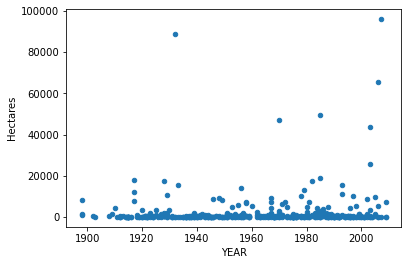

In [10]:
#identifying wildfires by size by year
df.plot.scatter(x='YEAR',y='Hectares')

# Larger fires in recent years
Our scatterplot shows that 6 of the 7 largest fires since records began have occured in the last 50 years, and 4 out of those 6 largest fires have occured since the year 2000. Now let's perform a linear regression to see if there is a correlation between average fire size and recent decades. 

In [11]:
df.to_csv('VCWildfires.csv')

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # To visualize
from sklearn.linear_model import LinearRegression

In [13]:
df2 = pd.read_csv ('VCWildfires.csv')

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      411 non-null    int64  
 1   Unnamed: 0.1    411 non-null    int64  
 2   Unnamed: 0.1.1  411 non-null    int64  
 3   X               411 non-null    float64
 4   Y               411 non-null    float64
 5   NAME            298 non-null    object 
 6   ACRES_RPT       411 non-null    int64  
 7   ACRES_CALC      411 non-null    int64  
 8   COMMENT         15 non-null     object 
 9   RUCODE          20 non-null     object 
 10  FULL_LABEL      409 non-null    object 
 11  INCIDENT_N      32 non-null     object 
 12  DECADE          411 non-null    int64  
 13  MONTH           411 non-null    int64  
 14  DAY             411 non-null    int64  
 15  RX_BURN         30 non-null     object 
 16  NAMELABEL       405 non-null    object 
 17  UIDENT          386 non-null    obj

In [16]:
data = pd.read_csv('VCWildfires.csv')  # load data set
X = data.iloc[:, 20].values.reshape(-1, 1)  # values converts it into a numpy array
Y = data.iloc[:, 37].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

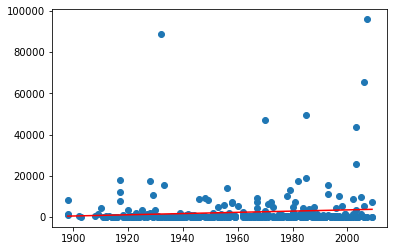

In [17]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

# Linear Regression
The linear regression scatterplot does indeed show a larger average fire size in recent decades, as evidenced by the red line increasing over time. However, the correlation appears subtle on this visualization, so lets try looking at the fires on a map to see if we can see the picture more clearly.

In [ ]:
df.to_csv('VCWildfires.csv')

In [26]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [27]:
conda list arcgis

# packages in environment at C:\Users\danie\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone:
#
# Name                    Version                   Build  Channel
arcgis                    1.9.1                 py37_2327    esri
arcgispro                 2.9                           0    esri

Note: you may need to restart the kernel to use updated packages.


In [28]:
from arcgis.gis import GIS
import pandas as pd

from arcgis.features import GeoAccessor, GeoSeriesAccessor

In [29]:
agol_gis = GIS()

In [30]:
data = agol_gis.content.search('title: VC Wildfire Data', 'Feature Layer', 
                               outside_org=True)
data[0]

<Item title:"VC Wildfire Data" type:Feature Layer Collection owner:danielperr_BootcampGIS>

# ArcGIS Feature Layer
Above is an ArcGIS Feature Layer I created that plots the location of every Ventura County wildfire from 1890-present using the same dataset as this notebook. The larger the icon, the larger the fire. The darker red and orange fires represent more recent decades, while the lighter yellows represent fires from earlier in the 1900s and the 1890s.  

In [46]:
item = data[0]

In [47]:
for lyr in item.layers:
    print(lyr.properties.name)

Wildfire data


In [57]:
Wildfire_map = agol_gis.map('Ventura County, California', zoomlevel=9)
Wildfire_map.add_layer(data)

In [55]:
Wildfire_map

MapView(layout=Layout(height='400px', width='100%'))

The larger the icon, the larger the fire. The red icons represent more recent decades, while the green icons represent fires from earlier in the 1900s and the 1890s. As we can see, the majority of our fires occured in more recent decades, and many of the larger circles are various shades of red rather than green. A more detailed version of this map is available as pdf in the "deliverable" file folder in this github repository. 